<a href="https://colab.research.google.com/github/elifbasarnn/Data-Science-Project/blob/main/Copy_of_TV_Shows_Classification_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Buraya dosyanın tam adını (uzantısıyla .csv) yazmalısın
dosya_adi = "/content/top_rated_2000webseries.csv"

try:
    # 1. Standart okuma denemesi
    df = pd.read_csv(dosya_adi)

    print("✅ Dosya başarıyla açıldı!")
    print(f"Satır Sayısı: {df.shape[0]}")
    print(f"Sütun Sayısı: {df.shape[1]}")

    print("\nVerinin ilk 5 satırı şöyle görünüyor:")
    display(df.head())

except Exception as e:
    print("❌ Bir hata oluştu, dosya adı yanlış olabilir veya format farklı.")
    print("Hata mesajı:", e)

✅ Dosya başarıyla açıldı!
Satır Sayısı: 2000
Sütun Sayısı: 11

Verinin ilk 5 satırı şöyle görünüyor:


,id,title,original_title,overview,premiere_date,popularity,genre,country_origin,original_language,rating,votes
0,1,Breaking Bad,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",2008-01-20,108.7820,"Drama, Crime",United States,English,8.900,16556
1,2,Avatar: The Last Airbender,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",2005-02-21,12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,3,Arcane,Arcane,Amid the stark discord of twin cities Piltover...,2021-11-06,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,4,When Life Gives You Tangerines,폭싹 속았수다,"In Jeju, a spirited girl and a steadfast boy's...",2025-03-07,18.5771,Drama,South Korea,Korean,8.751,423
4,5,Frieren: Beyond Journey's End,葬送のフリーレン,Decades after her party defeated the Demon Kin...,2023-09-29,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565


In [ ]:
# Verinin genel özetine bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   title              2000 non-null   object 
 2   original_title     2000 non-null   object 
 3   overview           1980 non-null   object 
 4   premiere_date      2000 non-null   object 
 5   popularity         2000 non-null   float64
 6   genre              2000 non-null   object 
 7   country_origin     1999 non-null   object 
 8   original_language  2000 non-null   object 
 9   rating             2000 non-null   float64
 10  votes              2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


En Düşük Puan: 7.086
En Yüksek Puan: 8.9
Ortalama Puan: 7.851328499999999


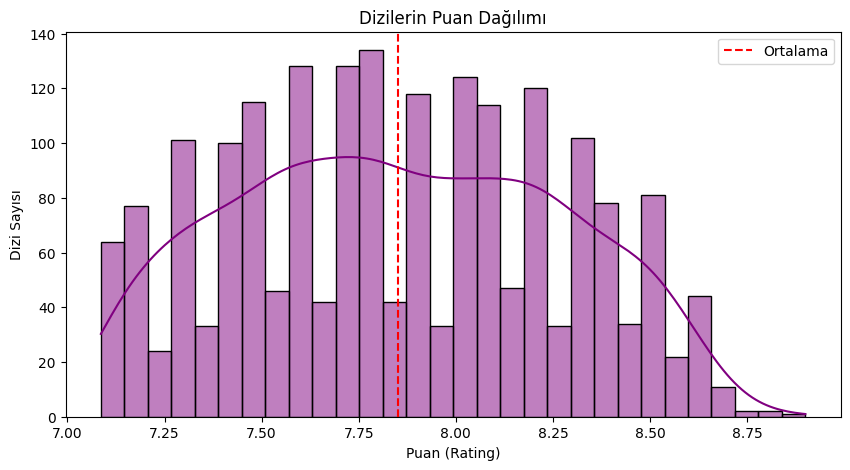

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Tarih sütununu düzeltelim (Sadece Yıl bilgisini alalım)
# Hata almamak için 'coerce' kullanıyoruz, bozuk tarih varsa NaT yapar
df['premiere_date'] = pd.to_datetime(df['premiere_date'], errors='coerce')
df['release_year'] = df['premiere_date'].dt.year

# 2. Gereksiz sütunları atalım (id, overview, original_title vs.)
# Modelde işimize yaramayacakları temizliyoruz
df_clean = df.drop(columns=['id', 'original_title', 'overview', 'premiere_date', 'original_language'])

# 3. Rating Dağılımını Görelim
print(f"En Düşük Puan: {df['rating'].min()}")
print(f"En Yüksek Puan: {df['rating'].max()}")
print(f"Ortalama Puan: {df['rating'].mean()}")

plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=30, kde=True, color='purple')
plt.title('Dizilerin Puan Dağılımı')
plt.xlabel('Puan (Rating)')
plt.ylabel('Dizi Sayısı')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label='Ortalama')
plt.legend()
plt.show()

Eşik Değer: 8.0
------------------------------
is_top_rated
0    1188
1     812
Name: count, dtype: int64


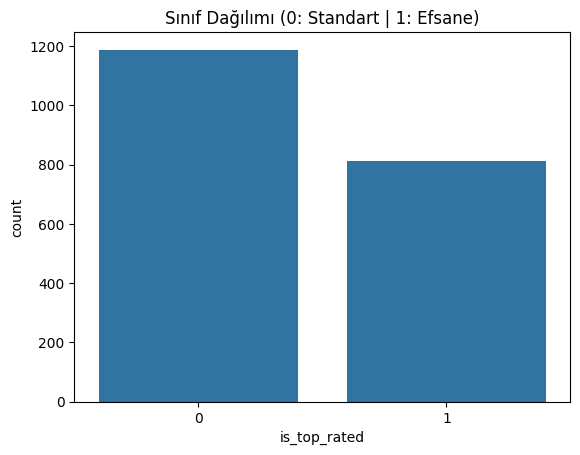

In [ ]:
# Eşik değerimizi belirledik
THRESHOLD = 8.0

# Yeni hedef sütunumuzu (Target) oluşturuyoruz
# 1: Top Tier (Efsane - 8.0 ve üstü)
# 0: Good (İyi ama Efsane Değil - 8.0 altı)
df_clean['is_top_rated'] = df_clean['rating'].apply(lambda x: 1 if x >= THRESHOLD else 0)

# Şimdi bakalım elimizde kaç tane 1, kaç tane 0 var?
# (Bu sayıların birbirine yakın olması model başarısı için iyidir)
print(f"Eşik Değer: {THRESHOLD}")
print("-" * 30)
print(df_clean['is_top_rated'].value_counts())

# Görsel olarak görelim
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_top_rated', data=df_clean)
plt.title('Sınıf Dağılımı (0: Standart | 1: Efsane)')
plt.show()

In [ ]:
# 1. Tür (Genre) sütununu temizleyelim (Boşlukları silelim ki " Drama" ile "Drama" aynı olsun)
# Örneğin "Drama, Crime" -> "Drama,Crime" yapıyoruz
df_clean['genre'] = df_clean['genre'].str.replace(' ', '')

# 2. One-Hot Encoding İşlemi (Virgüllerden ayırıp sütunlaştırıyoruz)
# Bu sihirli kod, her türü ayrı bir sütun yapar (0 ve 1 olarak)
genre_dummies = df_clean['genre'].str.get_dummies(sep=',')

# 3. Yeni tür sütunlarını ana verimize ekleyelim
df_final = pd.concat([df_clean, genre_dummies], axis=1)

# 4. Artık eski 'genre' (yazı olan) sütununa ihtiyacımız kalmadı, silelim
# Ayrıca 'title' (Dizi adı) modelde kullanılmaz, onu da çıkaralım
df_final = df_final.drop(columns=['genre', 'title'])

# Sonuca bakalım
print("Yeni Veri Setinin Boyutu:", df_final.shape)
print("-" * 30)
print("Sütun İsimleri:")
print(df_final.columns.tolist())

# İlk 3 satırı görelim (Bol bol 0 ve 1 göreceksin)
display(df_final.head(3))

Yeni Veri Setinin Boyutu: (2000, 24)
------------------------------
Sütun İsimleri:
['popularity', 'country_origin', 'rating', 'votes', 'release_year', 'is_top_rated', 'Action&Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'History', 'Kids', 'Mystery', 'News', 'Reality', 'Romance', 'Sci-Fi&Fantasy', 'Soap', 'Talk', 'War&Politics', 'Western']


,popularity,country_origin,rating,votes,release_year,is_top_rated,Action&Adventure,Animation,Comedy,Crime,...,Kids,Mystery,News,Reality,Romance,Sci-Fi&Fantasy,Soap,Talk,War&Politics,Western
0,108.7820,United States,8.9,16556,2008,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,12.5347,United States,8.8,4557,2005,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,22.5739,United States,8.8,5481,2021,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# --- ADIM: GEREKSİZ SÜTUNLARIN TEMİZLENMESİ ---

# 1. Yazı formatında kalan 'country_origin' sütununu atıyoruz
# Çünkü model sadece sayılarla çalışır.
if 'country_origin' in df_final.columns:
    df_final = df_final.drop(columns=['country_origin'])
    print("- 'country_origin' sütunu silindi.")

# 2. Rating sütununu da atıyoruz çünkü hedefimiz 'is_top_rated' oldu.
# (Eğer 'rating' sütunu kalırsa model kopya çeker. Puanı görüp sonucu %100 bilir.)
if 'rating' in df_final.columns:
    df_final = df_final.drop(columns=['rating'])
    print("- 'rating' sütunu (kopya olmaması için) silindi.")

# 3. Kontrol: Hepsi sayı mı?
print("\n--- GÜNCEL VERİ TİPLERİ ---")
print(df_final.dtypes)

# 4. HOCANIN İSTEDİĞİ GÖRSEL KONTROL
print("\n--- MODELLEME ÖNCESİ VERİ SETİNİN SON HALİ (İLK 5 SATIR) ---")
# Colab'de bu komut tabloyu görsel olarak ekrana basar
display(df_final.head())

- 'country_origin' sütunu silindi.
- 'rating' sütunu (kopya olmaması için) silindi.

--- GÜNCEL VERİ TİPLERİ ---
popularity          float64
votes                 int64
release_year          int32
is_top_rated          int64
Action&Adventure      int64
Animation             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
History               int64
Kids                  int64
Mystery               int64
News                  int64
Reality               int64
Romance               int64
Sci-Fi&Fantasy        int64
Soap                  int64
Talk                  int64
War&Politics          int64
Western               int64
dtype: object

--- MODELLEME ÖNCESİ VERİ SETİNİN SON HALİ (İLK 5 SATIR) ---


,popularity,votes,release_year,is_top_rated,Action&Adventure,Animation,Comedy,Crime,Documentary,Drama,...,Kids,Mystery,News,Reality,Romance,Sci-Fi&Fantasy,Soap,Talk,War&Politics,Western
0,108.7820,16556,2008,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,12.5347,4557,2005,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,22.5739,5481,2021,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,18.5771,423,2025,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,28.3761,565,2023,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Faktörlerin Başarıya Etkisi (Sayısal):
Animation           0.273105
votes               0.230672
popularity          0.178581
Comedy              0.108182
Action&Adventure    0.097676
Sci-Fi&Fantasy      0.081502
release_year        0.044479
Documentary        -0.008280
Kids               -0.010420
Western            -0.011461
History            -0.018491
Reality            -0.021694
Romance            -0.026157
News               -0.026157
Family             -0.026710
Talk               -0.026734
War&Politics       -0.026821
Mystery            -0.054261
Soap               -0.072600
Crime              -0.087296
Drama              -0.104176
Name: is_top_rated, dtype: float64


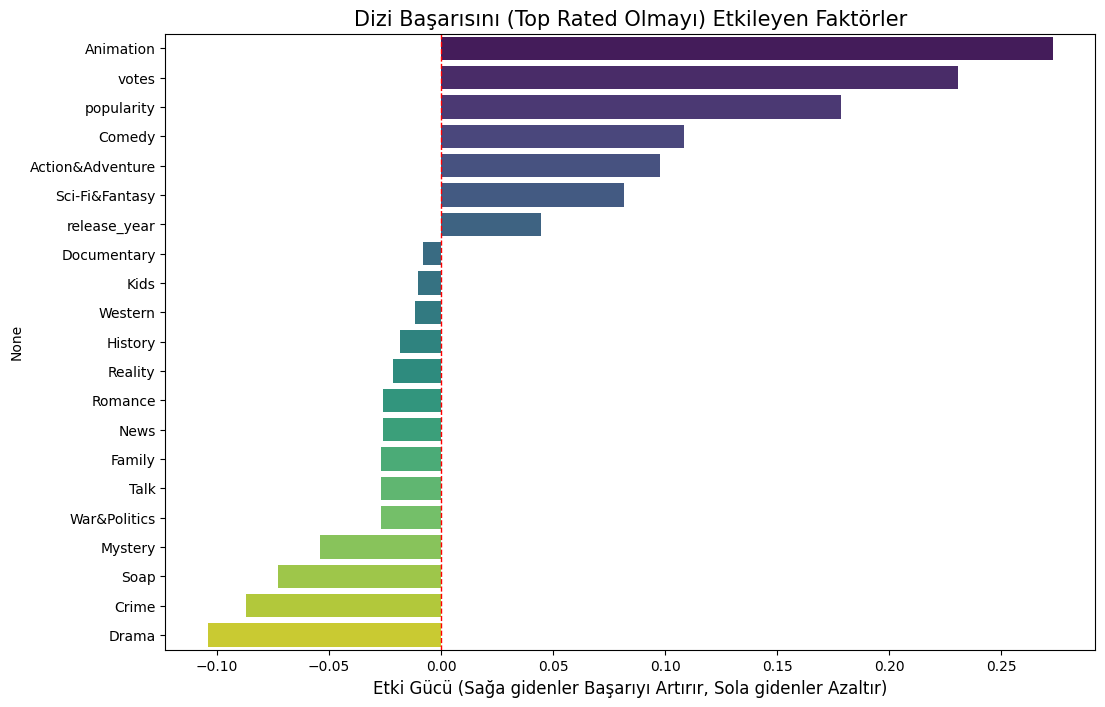

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Korelasyon Hesabı
# is_top_rated ile diğer sütunlar arasındaki ilişkiyi bulup sıralıyoruz
correlation = df_final.corr()['is_top_rated'].sort_values(ascending=False)

# Kendisi (is_top_rated) %100 çıkacağı için onu listeden çıkaralım
correlation = correlation.drop('is_top_rated')

print("Faktörlerin Başarıya Etkisi (Sayısal):")
print(correlation)

# 2. Görselleştirme (Sunum için Bar Grafiği)
plt.figure(figsize=(12, 8))
# Renkli ve okunaklı bir grafik çizelim
# Hata vermeyen güncel kod:
sns.barplot(x=correlation.values, y=correlation.index, palette="viridis", hue=correlation.index, legend=False)

plt.title('Dizi Başarısını (Top Rated Olmayı) Etkileyen Faktörler', fontsize=15)
plt.xlabel('Etki Gücü (Sağa gidenler Başarıyı Artırır, Sola gidenler Azaltır)', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=1) # 0 noktasına çizgi çekelim
plt.show()

In [ ]:
# Gerekli Kütüphaneler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. T-TESTİ  ---
# Sadece sonucu yazdırıp geçiyoruz, grafikle uğraşmıyoruz.
print("--- İSTATİSTİKSEL KONTROL (T-TEST) ---")
group_top = df_final[df_final['is_top_rated'] == 1]['votes']
group_standard = df_final[df_final['is_top_rated'] == 0]['votes']

t_stat, p_value = stats.ttest_ind(group_top, group_standard)
print(f"P-Değeri: {p_value:.2e}")

if p_value < 0.05:
    print("SONUÇ: İstatistiksel olarak anlamlı fark var. (Analiz onaylandı, devam ediyoruz.)")
else:
    print("SONUÇ: Anlamlı fark yok.")
print("-" * 40)

# --- 2. VERİYİ MODELLEME İÇİN HAZIRLAMA ---
# Girdiler (X) ve Hedef (y)
X = df_final.drop('is_top_rated', axis=1)
y = df_final['is_top_rated']

# %70 Eğitim, %30 Test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ölçeklendirme (Scaling) - Lojistik ve KNN için zorunludur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nVeri seti eğitim ve test için hazırlandı.")

--- İSTATİSTİKSEL KONTROL (T-TEST) ---
P-Değeri: 1.45e-25
SONUÇ: İstatistiksel olarak anlamlı fark var. (Analiz onaylandı, devam ediyoruz.)
----------------------------------------

Veri seti eğitim ve test için hazırlandı.


--- MODEL 1: LOJİSTİK REGRESYON ÇALIŞIYOR ---
✅ Lojistik Regresyon Doğruluk Oranı (Accuracy): %70.17
----------------------------------------
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       347
           1       0.69      0.54      0.60       253

    accuracy                           0.70       600
   macro avg       0.70      0.68      0.68       600
weighted avg       0.70      0.70      0.69       600



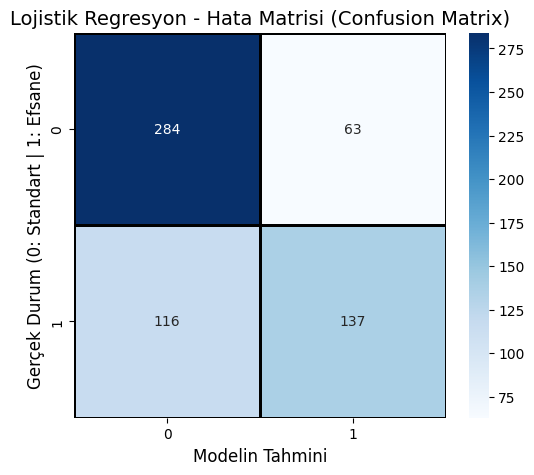

In [ ]:
# Gerekli kütüphaneleri çağıralım (Eğer yukarıda çağırdıysanız tekrar gerekmez ama garanti olsun)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("--- MODEL 1: LOJİSTİK REGRESYON ÇALIŞIYOR ---")

# 1. Modeli Tanımla
# (random_state=42: Her çalıştırdığımızda aynı sonucu versin diye sabitliyoruz)
log_model = LogisticRegression(random_state=42)

# 2. Modeli Eğit (Fit)
# Ölçeklenmiş eğitim verisini (X_train_scaled) kullanıyoruz
log_model.fit(X_train_scaled, y_train)

# 3. Tahmin Et (Predict)
# Test verisini verip "Sence bunlar başarılı mı?" diye soruyoruz
y_pred_log = log_model.predict(X_test_scaled)

# 4. Başarıyı Ölç
acc_log = accuracy_score(y_test, y_pred_log)

print(f"✅ Lojistik Regresyon Doğruluk Oranı (Accuracy): %{acc_log*100:.2f}")
print("-" * 40)
print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_log))

# 5. Görselleştirme (Karmaşıklık Matrisi)
# Modelin nerede hata yaptığını gösteren tablo
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=1)
plt.title('Lojistik Regresyon - Hata Matrisi (Confusion Matrix)', fontsize=14)
plt.ylabel('Gerçek Durum (0: Standart | 1: Efsane)', fontsize=12)
plt.xlabel('Modelin Tahmini', fontsize=12)
plt.show()

--- GELİŞMİŞ LOJİSTİK REGRESYON ANALİZİ ---
✅ Model Doğruluğu: %70.17


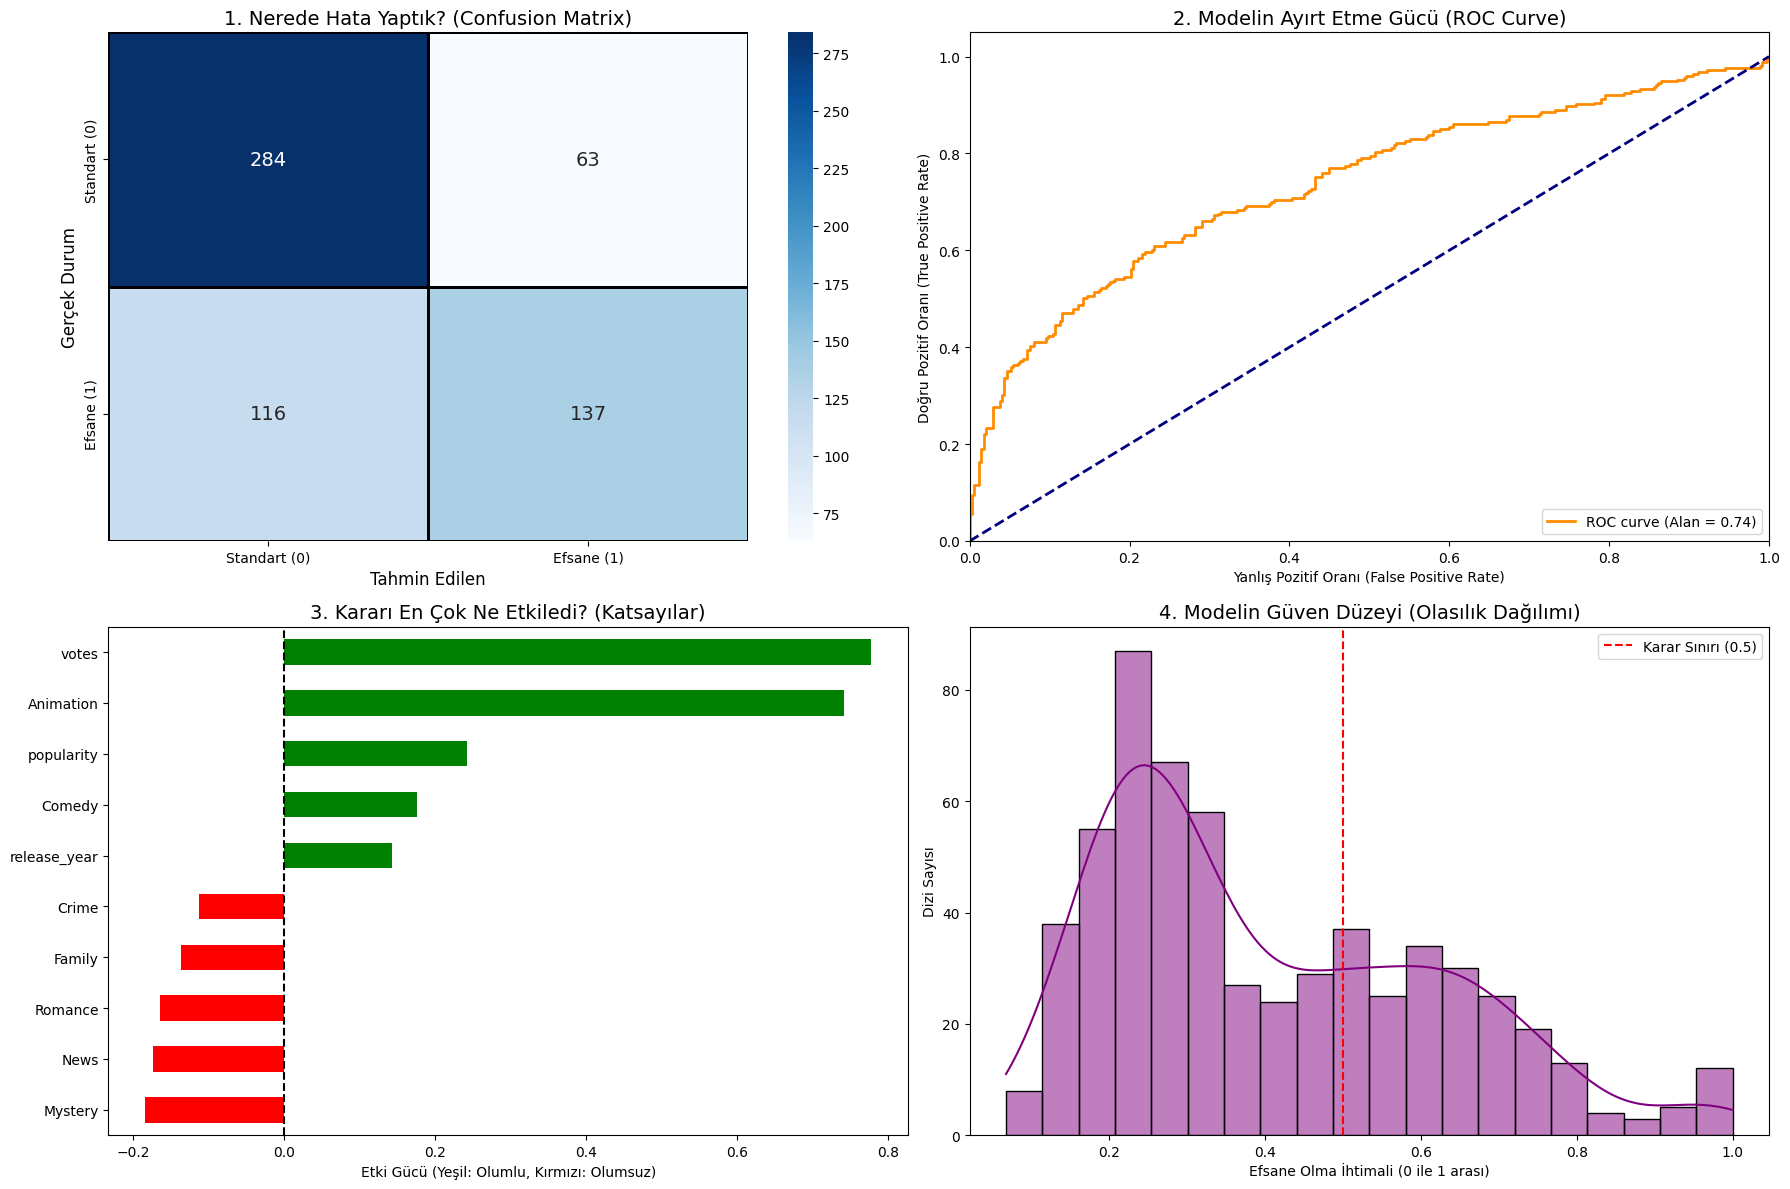

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# --- MODEL KURULUMU ---
print("--- GELİŞMİŞ LOJİSTİK REGRESYON ANALİZİ ---")
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Tahminler (Hem sınıf hem olasılık olarak alıyoruz)
y_pred = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:, 1] # 1 olma olasılığı

# Başarı Puanı
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Doğruluğu: %{acc*100:.2f}")


# --- GÖRSELLEŞTİRME (4 GRAFİK) ---
plt.figure(figsize=(18, 12))

# GRAFİK 1: Confusion Matrix (Karmaşıklık Matrisi)
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=1, annot_kws={"size": 14})
plt.title('1. Nerede Hata Yaptık? (Confusion Matrix)', fontsize=14)
plt.xlabel('Tahmin Edilen', fontsize=12)
plt.ylabel('Gerçek Durum', fontsize=12)
plt.xticks([0.5, 1.5], ['Standart (0)', 'Efsane (1)'])
plt.yticks([0.5, 1.5], ['Standart (0)', 'Efsane (1)'])

# GRAFİK 2: ROC Eğrisi (Modelin Ayırt Etme Gücü)
plt.subplot(2, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Alan = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Şans çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
plt.title('2. Modelin Ayırt Etme Gücü (ROC Curve)', fontsize=14)
plt.legend(loc="lower right")

# GRAFİK 3: Özellik Katsayıları (Feature Coefficients) - Modelin "Sırları"
plt.subplot(2, 2, 3)
coeffs = pd.Series(log_model.coef_[0], index=X.columns)
# En etkili 10 özelliği alalım (Mutlak değerce en büyükler)
top_features = coeffs.abs().sort_values(ascending=False).head(10).index
top_coeffs = coeffs[top_features].sort_values()
colors = ['red' if x < 0 else 'green' for x in top_coeffs]
top_coeffs.plot(kind='barh', color=colors)
plt.title('3. Kararı En Çok Ne Etkiledi? (Katsayılar)', fontsize=14)
plt.xlabel('Etki Gücü (Yeşil: Olumlu, Kırmızı: Olumsuz)')
plt.axvline(0, color='black', linestyle='--')

# GRAFİK 4: Olasılık Dağılımı (Model Ne Kadar Emin?)
plt.subplot(2, 2, 4)
sns.histplot(y_proba, bins=20, kde=True, color='purple')
plt.title('4. Modelin Güven Düzeyi (Olasılık Dağılımı)', fontsize=14)
plt.xlabel('Efsane Olma İhtimali (0 ile 1 arası)')
plt.ylabel('Dizi Sayısı')
plt.axvline(0.5, color='red', linestyle='--', label='Karar Sınırı (0.5)')
plt.legend()

plt.tight_layout()
plt.show()

--- GELİŞMİŞ KNN ANALİZİ ---
🔎 Analiz Sonucu En İdeal Komşu Sayısı (k): 15
✅ Maksimum Doğruluk: %69.17


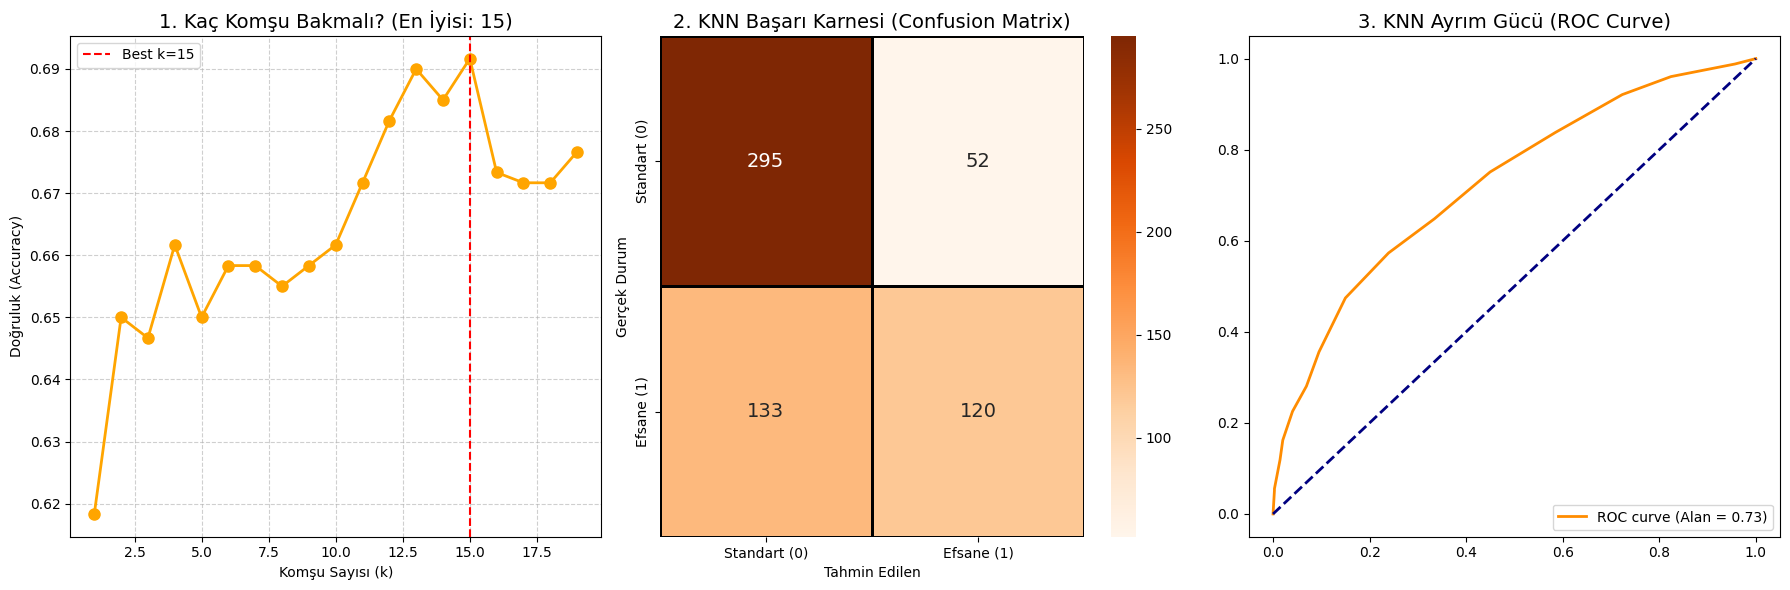

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

print("--- GELİŞMİŞ KNN ANALİZİ ---")

# --- ADIM 1: EN İYİ 'K' DEĞERİNİ BULMA (Elbow Method) ---
# Hocaya göstermelik: "Biz ezbere k=5 seçmedik, analiz ettik" demek için.
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.score(X_test_scaled, y_test))

# En iyi K değerini bulalım
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"🔎 Analiz Sonucu En İdeal Komşu Sayısı (k): {best_k}")
print(f"✅ Maksimum Doğruluk: %{best_acc*100:.2f}")


# --- ADIM 2: EN İYİ 'K' İLE FİNAL MODELİ KURMA ---
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_knn = final_knn.predict(X_test_scaled)
y_proba_knn = final_knn.predict_proba(X_test_scaled)[:, 1]


# --- GÖRSELLEŞTİRME (3 ÖZEL GRAFİK) ---
plt.figure(figsize=(18, 6))

# GRAFİK 1: K-Değeri Performans Analizi (Elbow Graph)
plt.subplot(1, 3, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='orange', linewidth=2, markersize=8)
plt.title(f'1. Kaç Komşu Bakmalı? (En İyisi: {best_k})', fontsize=14)
plt.xlabel('Komşu Sayısı (k)')
plt.ylabel('Doğruluk (Accuracy)')
plt.grid(True, linestyle='--', alpha=0.6)
# En iyi noktayı işaretleyelim
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k={best_k}')
plt.legend()

# GRAFİK 2: Confusion Matrix
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linecolor='black', linewidths=1, annot_kws={"size": 14})
plt.title('2. KNN Başarı Karnesi (Confusion Matrix)', fontsize=14)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.xticks([0.5, 1.5], ['Standart (0)', 'Efsane (1)'])
plt.yticks([0.5, 1.5], ['Standart (0)', 'Efsane (1)'])

# GRAFİK 3: ROC Eğrisi
plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Alan = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('3. KNN Ayrım Gücü (ROC Curve)', fontsize=14)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

--- MODEL 2: RANDOM FOREST (Rastgele Orman) ---
✅ Random Forest Doğruluğu: %71.00


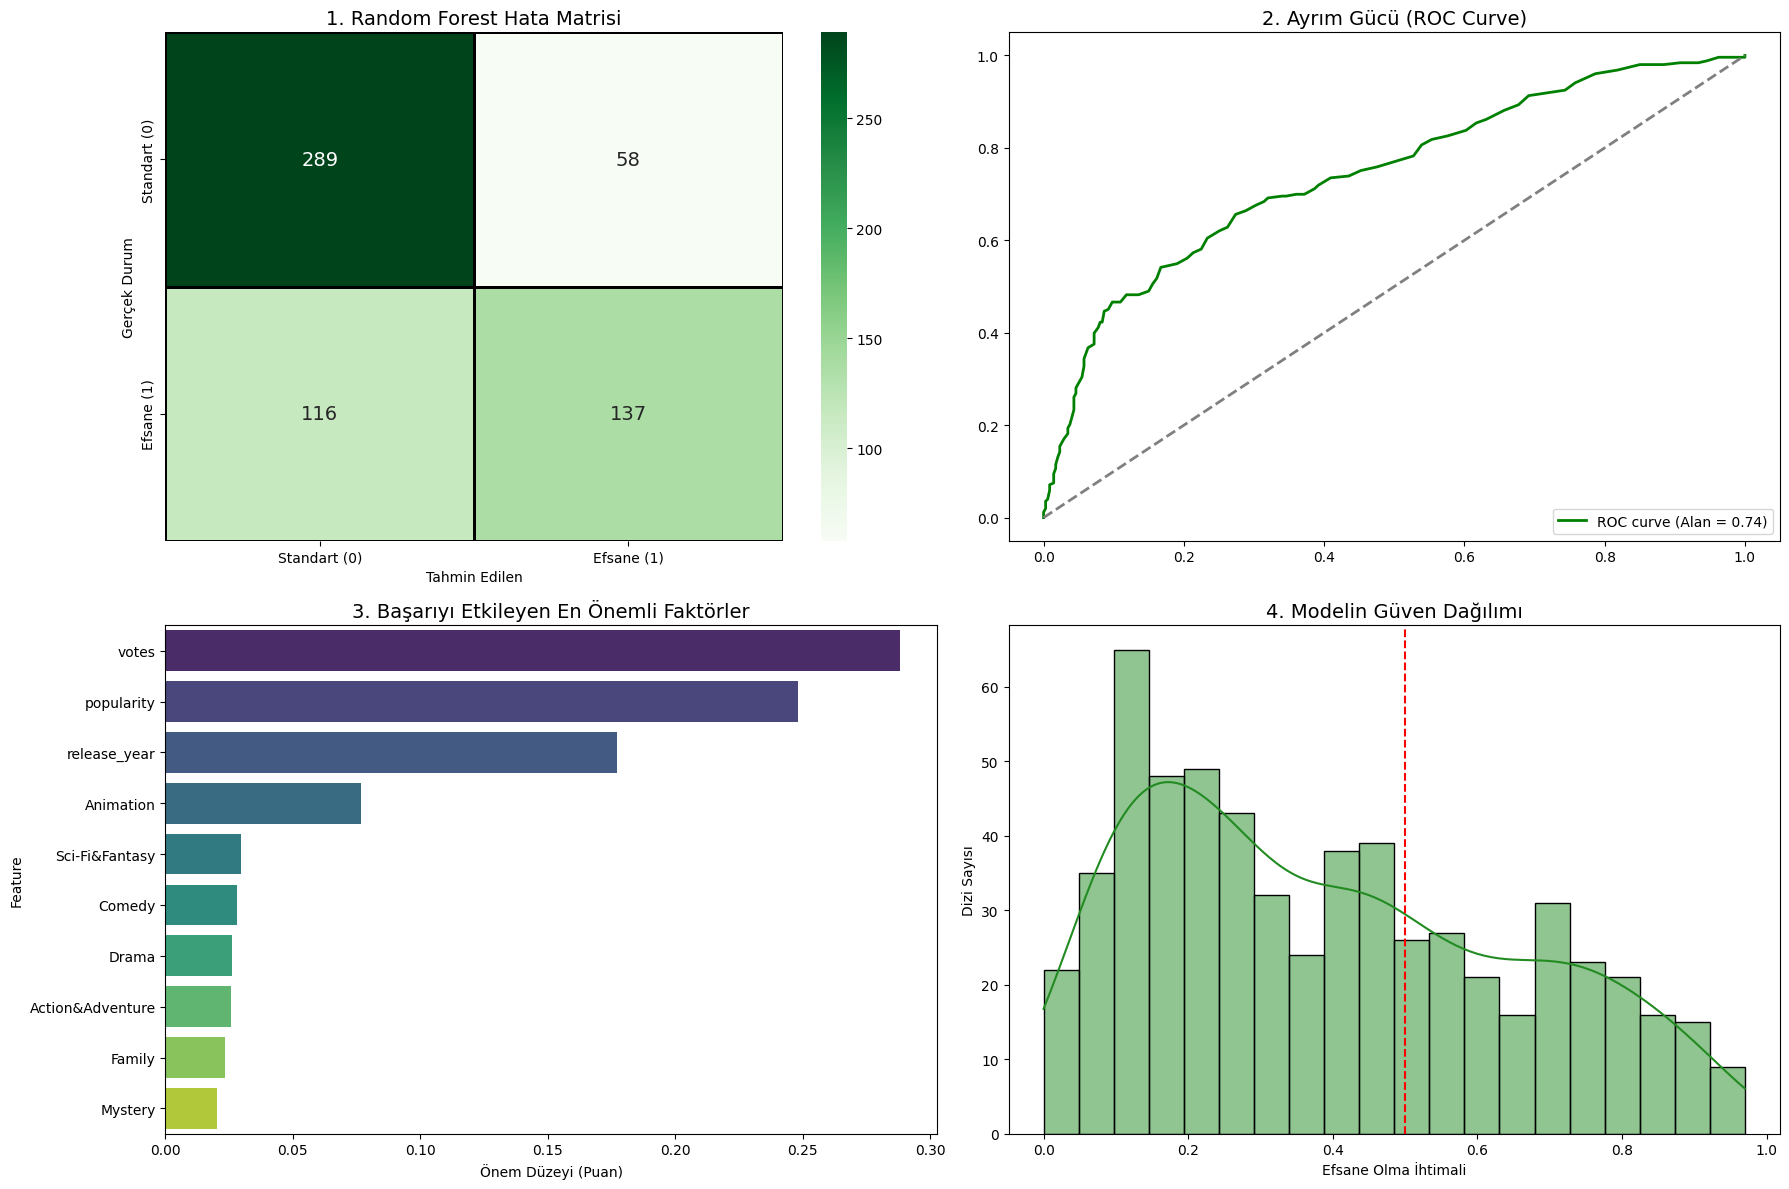

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

print("--- MODEL 2: RANDOM FOREST (Rastgele Orman) ---")

# 1. Modeli Kur (100 tane karar ağacı kullansın)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Modeli Eğit
rf_model.fit(X_train_scaled, y_train)

# 3. Tahmin Et
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1] # Olasılıklar

# 4. Başarıyı Ölç
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Doğruluğu: %{acc_rf*100:.2f}")


# --- GÖRSELLEŞTİRME (4 GRAFİK) ---
plt.figure(figsize=(18, 12))

# GRAFİK 1: Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linecolor='black', linewidths=1, annot_kws={"size": 14})
plt.title('1. Random Forest Hata Matrisi', fontsize=14)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.xticks([0.5, 1.5], ['Standart (0)', 'Efsane (1)'])
plt.yticks([0.5, 1.5], ['Standart (0)', 'Efsane (1)'])

# GRAFİK 2: ROC Eğrisi
plt.subplot(2, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (Alan = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('2. Ayrım Gücü (ROC Curve)', fontsize=14)
plt.legend(loc="lower right")

# GRAFİK 3: Feature Importance (EN ÖNEMLİ KISIM)
# Random Forest, hangi özelliğin ne kadar işe yaradığını hesaplar
plt.subplot(2, 2, 3)
importances = rf_model.feature_importances_
feature_names = X.columns
# DataFrame yapıp sıralayalım
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10) # En önemli 10 tanesi

sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_imp_df, palette='viridis', legend=False)
plt.title('3. Başarıyı Etkileyen En Önemli Faktörler', fontsize=14)
plt.xlabel('Önem Düzeyi (Puan)')

# GRAFİK 4: Olasılık Dağılımı
plt.subplot(2, 2, 4)
sns.histplot(y_proba_rf, bins=20, kde=True, color='forestgreen')
plt.title('4. Modelin Güven Dağılımı', fontsize=14)
plt.xlabel('Efsane Olma İhtimali')
plt.ylabel('Dizi Sayısı')
plt.axvline(0.5, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def dizi_tahmin_et(votes, year, genre_name):
    print(f"\n--- YENİ DİZİ TAHMİNİ: {genre_name} ({year}) ---")

    # 1. Boş bir şablon oluştur (Eğitim verisiyle aynı sütunlara sahip)
    # Sadece X (girdi) sütunlarını alıyoruz
    ornek_veri = pd.DataFrame(columns=X.columns)
    ornek_veri.loc[0] = 0 # Önce hepsini 0 yap

    # 2. Kullanıcının girdiği değerleri doldur
    ornek_veri['votes'] = votes
    ornek_veri['release_year'] = year
    ornek_veri['popularity'] = df_final['popularity'].mean() # Popülerliği ortalama alalım (bilmiyoruz)

    # Türü (Genre) ayarla
    if genre_name in ornek_veri.columns:
        ornek_veri[genre_name] = 1
    else:
        print(f"Uyarı: '{genre_name}' diye bir tür veride yok. Diğer özellikleri kullanıyorum.")

    # 3. Ölçeklendirme (Scaling) - Çok Önemli!
    # Modeli eğitirken kullandığımız scaler'ı burada da kullanmalıyız
    ornek_veri_scaled = scaler.transform(ornek_veri)

    # 4. En iyi modelle (Lojistik Regresyon) tahmin et
    tahmin = log_model.predict(ornek_veri_scaled)[0]
    olasilik = log_model.predict_proba(ornek_veri_scaled)[0][1]

    # 5. Sonucu Yazdır
    if tahmin == 1:
        print(f"🎬 SONUÇ: EFSANE (Top Rated) Olacak! 🏆")
        print(f"📊 Başarı İhtimali: %{olasilik*100:.2f}")
    else:
        print(f"🎬 SONUÇ: STANDART Dizi Olacak.")
        print(f"📊 Başarı İhtimali: %{olasilik*100:.2f}")

# --- DENEME YAPALIM ---
# Senaryo 1: Çok oy almış bir Animasyon (Başarılı olması beklenir)
dizi_tahmin_et(votes=5000, year=2025, genre_name='Animation')

# Senaryo 2: Az oy almış bir Reality Show (Başarısız olması beklenir)
dizi_tahmin_et(votes=100, year=2025, genre_name='Reality')

# Senaryo 3: Ortalama bir Drama
dizi_tahmin_et(votes=1500, year=2024, genre_name='Drama')


--- YENİ DİZİ TAHMİNİ: Animation (2025) ---
🎬 SONUÇ: EFSANE (Top Rated) Olacak! 🏆
📊 Başarı İhtimali: %94.29

--- YENİ DİZİ TAHMİNİ: Reality (2025) ---
🎬 SONUÇ: STANDART Dizi Olacak.
📊 Başarı İhtimali: %36.86

--- YENİ DİZİ TAHMİNİ: Drama (2024) ---
🎬 SONUÇ: STANDART Dizi Olacak.
📊 Başarı İhtimali: %42.43
